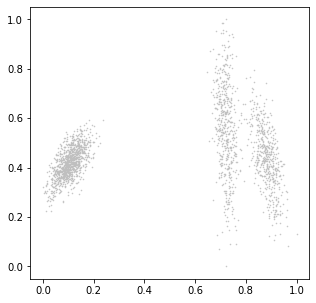

In [1]:
import numpy as np 
import numpy.matlib 
import matplotlib.pyplot as plt
from matplotlib import colors

# np.random.rand = uniform random generation, [0, 1]
# np.random.randn = normal random generation, N(0, 1)
r1 = 10*(np.random.rand(2,2) - 0.5) # [-1, 1]
r2 = 10*(np.random.rand(2,2) - 0.5) # [-1, 1]
r3 = 10*(np.random.rand(2,2) - 0.5) # [-1, 1]

t1 = 50*(np.random.rand(2) - 0.5)
t2 = 50*(np.random.rand(2) - 0.5)
t3 = 50*(np.random.rand(2) - 0.5)

X1 = np.random.randn(1000,2)
X1 = X1.dot(r1) + t1

X2 = np.random.randn(500,2)
X2 = X2.dot(r2) + t2

X3 = np.random.randn(500,2)
X3 = X3.dot(r3) + t3

# unlabel data
X = np.vstack((X1, X2, X3))

# normalization, [0, 1]
Xmin = np.min(X, axis = 0)
Xmax = np.max(X, axis = 0)
X = (X - Xmin) / (Xmax - Xmin)

plt.figure(figsize = (5,5))
plt.plot(X[:,0],X[:,1],".",markersize = 1, color = [0.75, 0.75, 0.75])

N,D = X.shape

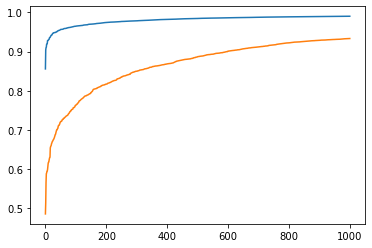

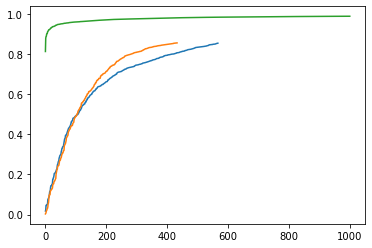

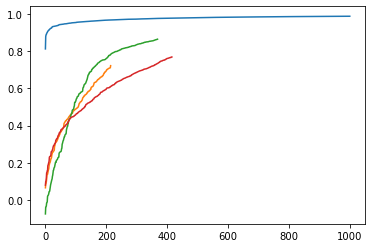

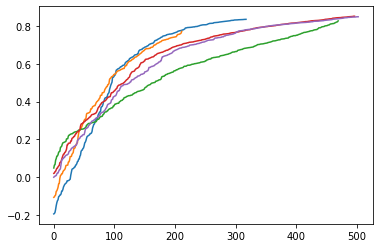

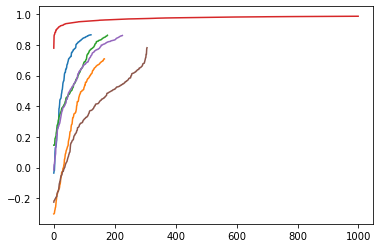

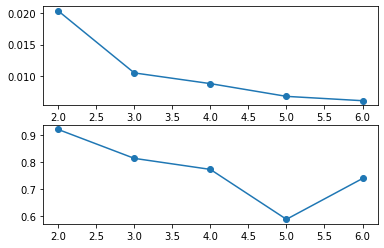

In [2]:
maxK = 6

inertia = np.full(maxK + 1,np.nan)
silhouette_score = np.full(maxK + 1,np.nan)
for K in range(2,maxK + 1):
    maxIter = 10

    while (np.isnan(silhouette_score[K]) == True):
        mu0 = np.random.rand(D,K)
        mu = np.copy(mu0)

        # k-means clustering
        dist2 = np.zeros((N,K)) 
        for iter in range(0,maxIter):
            # Estep
            for k in range(0,K):
                dist2[:,k] = np.sum( (X - np.matlib.repmat(mu[:,k].reshape(1,D),N,1))**2, axis = 1)
            c = np.argmin(dist2, axis = 1)

            # Mstep
            for k in range(0,K):
                mu[:,k] = np.mean(X[c == k,:], axis = 0)

        # intertia
        inertia[K] = np.mean(np.min(dist2,axis = 1))
        
        # silhouette score
        silhouette = np.zeros(N) # silhouette coefficient, 전체 샘플 N개에 대해서
        
        for n in range(0,N):
            
            # a = intra-cluster distance, 내 cluster에 속한 모든 샘플과의 평균 거리
            k1 = c[n] # 내가 속한 cluster의 index
            idk1 = np.where(c == k1) # 내가 속한 k1에 들어있는 sample의 index   
            if (len(idk1) != 0):
                a = np.sum((X[idk1,:] - np.matlib.repmat(X[n,:].reshape(1,D),len(idk1),1))**2, axis = 0)
                a = np.nanmean(a)
            else:
                a = 0

            # b = 나랑 가장 이웃한 cluster에 속한 모든 샘플과의 평균 거리
            dist2_n = dist2[n,:]
            dist2_nsort = np.sort(dist2_n)
            dist2_ncloest = dist2_nsort[1] # 두번째로 가까운 cluster까지의 거리

            k2 = np.where(dist2_n == dist2_ncloest)
            k2 = k2[0]
            # k2 = 두번째로 가까운 cluster의 인덱스 = 0, 1, 2, ..., K
            
            idk2 = np.where(c == k2)
            # 두번째로 가까운 cluster에 속한 모든 샘플의 index
            
            if (len(idk2) != 0):
                b = np.sum((X[idk2,:] - np.matlib.repmat(X[n,:].reshape(1,D),len(idk2),1))**2, axis = 0)
                b = np.nanmean(b)
            else:
                b = 0           

            silhouette[n] = (b - a) / np.max([a, b])

        silhouette_score[K] = np.nanmean(silhouette)        
        
    plt.figure()
    for k in range(0,K):
        plt.plot(np.sort(silhouette[c == k]))  # 가로축: 샘플의 개수, 세로축: 실루엣 계수 값

        
plt.figure()
plt.subplot(2,1,1)
plt.plot(inertia,'o-')
plt.subplot(2,1,2)
plt.plot(silhouette_score,'o-')

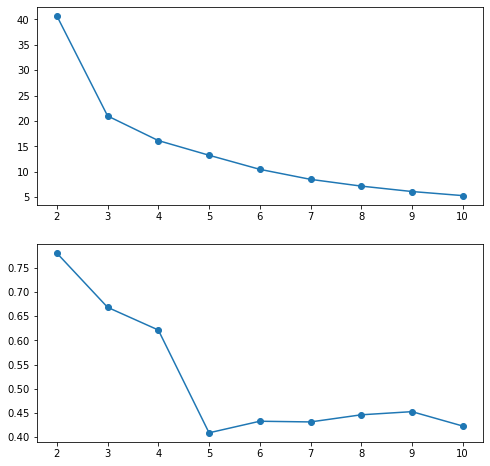

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 

maxK = 10

score_inertia = np.full(maxK + 1,np.nan)
score_silhouette = np.full(maxK + 1,np.nan)

# cluster의 개수를 달리해가면서 반복적으로 계산을 하는 것
for K in range(2,maxK + 1):
# 주어진 데이터 X를 가지고 kmeans clustering을 진행
    kmeans = KMeans(n_clusters = K, random_state=0).fit(X)
    
# inertia는 이미 구해놓음
    score_inertia[K] = kmeans.inertia_    
# 실루엣 스코어는 앞에서 부른 함수를 씀
    score_silhouette[K] = silhouette_score(X, kmeans.labels_)
    
plt.figure(figsize = (8,8))
plt.subplot(2,1,1)
plt.plot(score_inertia,'o-')
plt.subplot(2,1,2)
plt.plot(score_silhouette,'o-')